## 💾 The data 

### I have access to seven years of CO2 emissions data for Canadian vehicles ([source](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64#wb-auto-6)):

- "Make" - The company that manufactures the vehicle.
- "Model" - The vehicle's model.
- "Vehicle Class" - Vehicle class by utility, capacity, and weight.
- "Engine Size(L)" - The engine's displacement in liters.
- "Cylinders" - The number of cylinders.
- "Transmission" - The transmission type: A = Automatic, AM = Automatic Manual, AS = Automatic with select shift, AV = Continuously variable, M = Manual, 3 - 10 = the number of gears.
- "Fuel Type" - The fuel type: X = Regular gasoline, Z = Premium gasoline, D = Diesel, E = Ethanol (E85), N = natural gas.
- "Fuel Consumption Comb (L/100 km)" - Combined city/highway (55%/45%) fuel consumption in liters per 100 km (L/100 km).
- "CO2 Emissions(g/km)" - The tailpipe carbon dioxide emissions in grams per kilometer for combined city and highway driving. 

The data comes from the Government of Canada's open data [website](https://open.canada.ca/en).

# Importing packages

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Loading Data and preview 

In [2]:
# Load the data
cars = pd.read_csv('co2_emissions_canada.csv')
# Preview the dataframe
cars

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,10.6,244
...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.4,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.9,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,10.3,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,9.9,232


# Exploring Data

In [3]:
#Checking null values
cars.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption Comb (L/100 km)    0
CO2 Emissions(g/km)                 0
dtype: int64

In [4]:
# check duplicates
cars[cars.duplicated()]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
1075,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,10.6,244
1076,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,10.0,230
1081,ALFA ROMEO,4C,TWO-SEATER,1.8,4,AM6,Z,8.4,193
1082,ASTON MARTIN,DB9,MINICOMPACT,5.9,12,A6,Z,15.6,359
1084,ASTON MARTIN,V8 VANTAGE,TWO-SEATER,4.7,8,AM7,Z,14.7,338
...,...,...,...,...,...,...,...,...,...
7365,VOLKSWAGEN,Golf GTI,COMPACT,2.0,4,M6,X,8.7,203
7366,VOLKSWAGEN,Jetta,COMPACT,1.4,4,AS8,X,7.0,162
7367,VOLKSWAGEN,Jetta,COMPACT,1.4,4,M6,X,7.0,163
7368,VOLKSWAGEN,Jetta GLI,COMPACT,2.0,4,AM7,X,8.4,196


In [5]:
# remove duplicates
cars= cars.drop_duplicates()
cars.reset_index
cars

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,10.6,244
...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.4,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.9,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,10.3,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,9.9,232


In [6]:
# create numpy arrays
cars_makes = cars['Make'].to_numpy()
cars_models = cars['Model'].to_numpy()
cars_classes = cars['Vehicle Class'].to_numpy()
cars_engine_sizes = cars['Engine Size(L)'].to_numpy()
cars_cylinders = cars['Cylinders'].to_numpy()
cars_transmissions = cars['Transmission'].to_numpy()
cars_fuel_types = cars['Fuel Type'].to_numpy()
cars_fuel_consumption = cars['Fuel Consumption Comb (L/100 km)'].to_numpy()
cars_co2_emissions = cars['CO2 Emissions(g/km)'].to_numpy()

In [31]:
# Fixing strings
cars.loc[:,"Make"]=cars.loc[:,"Make"].map(str.upper)
cars.loc[:,"Model"]=cars.loc[:,"Model"].map(str.upper)
cars.loc[:, "Vehicle Class"]= cars.loc[:,"Vehicle Class"].map(str.upper)

cars

C:\Users\els3d\AppData\Local\Temp\ipykernel_308\3031498204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars.loc[:,"Make"]=cars.loc[:,"Make"].map(str.upper)
C:\Users\els3d\AppData\Local\Temp\ipykernel_308\3031498204.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars.loc[:,"Model"]=cars.loc[:,"Model"].map(str.upper)
C:\Users\els3d\AppData\Local\Temp\ipykernel_308\3031498204.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,10.6,244
...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.4,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.9,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,10.3,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,9.9,232


# Answering the questions

- what is the median Engine size in liters?

In [8]:
print("The Median of Engine sizes is {}".format(round(cars_engine_sizes.mean(),2)) + " L")

The Median of Engine sizes is 3.16 L


- What is the average fuel consumption for regular gasoline, premium gasoline, Ethanol, and diesel?

In [9]:
re_mean= np.mean(cars_fuel_types== "X")
pre_mean= np.mean(cars_fuel_types== "Z")
eth_mean= np.mean(cars_fuel_types== "E")
dies_mean= np.mean(cars_fuel_types== "D")
Natural_gas_mean= np.mean(cars_fuel_types== "N")
print("The regular gasoline consumption Average is {}".format(round(re_mean, 2)))
print("The Preimum gasoline consumption Average is {}".format(round(pre_mean, 2)))
print("The Ethanol consumption Average is {}".format(round(eth_mean, 2)))
print("The Diesel counsumption Average is {}".format(round(dies_mean, 2)))
print("The Natural gas counsumption Average is {}".format(round(Natural_gas_mean, 2)))


The regular gasoline consumption Average is 0.48
The Preimum gasoline consumption Average is 0.44
The Ethanol consumption Average is 0.05
The Diesel counsumption Average is 0.02
The Natural gas counsumption Average is 0.0


- What is the correlation between fuel consumption and CO2 emissions?

In [10]:
corr= cars["Fuel Consumption Comb (L/100 km)"].corr(cars["CO2 Emissions(g/km)"])
print("The correlation Cofficient between fuel consumption and Co2 emissions is {}".format(round(corr, 2)))

The correlation Cofficient between fuel consumption and Co2 emissions is 0.92


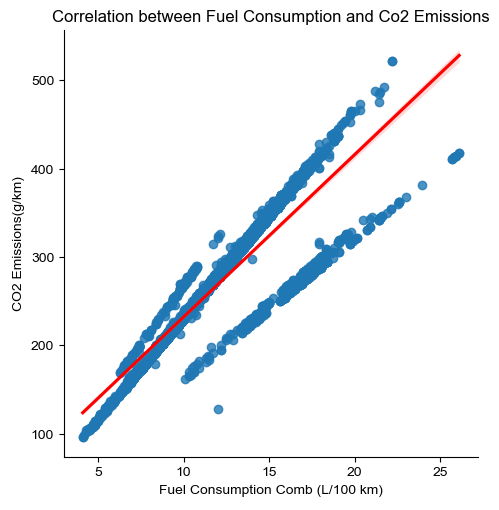

In [11]:
sns.lmplot(x= "Fuel Consumption Comb (L/100 km)", y= "CO2 Emissions(g/km)", data= cars, line_kws={'color': 'red'})
sns.set(rc={'figure.figsize':(5, 3)})
ax = plt.gca()
ax.set_title("Correlation between Fuel Consumption and Co2 Emissions")
plt.show()

Comment : 
The correlation between fuel consuption and Co2 emissions is very strong

- Which vehicle class has lower average Co2 missions, 'SUV - SMALL' or 'Mid_size'?

In [12]:
comparing= cars[cars["Vehicle Class"].isin(["SUV - SMALL" ,"MID-SIZE"])].groupby("Vehicle Class")["CO2 Emissions(g/km)"].mean().sort_values()
low_vehicle= comparing.index[0]
low_value= comparing.values[0]
print("The Vehicle class which has the lower average of Co2 missions is: {}".format(low_vehicle) + ", by Average : {}".format(round(low_value, 2)) + " G/KM")

The Vehicle class which has the lower average of Co2 missions is: MID-SIZE, by Average : 222.44 G/KM


- What are the average CO2 emissions for all vehicles? For vehicles with an engine size of 2.0 liters or smaller?

In [13]:
co2_all= cars_co2_emissions.mean()
co2_les2= cars[cars["Engine Size(L)"]<= 2.0]["CO2 Emissions(g/km)"].mean()
print("The Average co2 emissions for all vehicles is {}".format(round(co2_all,2)) + " G/KM The average co2 emissions for vehicles with engine size of 2.0 liters or smaller is {}".format(round(co2_les2, 2))+ " G/KM")

The Average co2 emissions for all vehicles is 250.95 G/KM The average co2 emissions for vehicles with engine size of 2.0 liters or smaller is 198.58 G/KM


# Extra insights

- What is the correlation between the Engine size and CO2 emissions?

In [14]:
corr= cars["Engine Size(L)"].corr(cars["CO2 Emissions(g/km)"])
print("The correlation Cofficient between Engine Size(L) and Co2 emissions is {}".format(round(corr, 2)))


The correlation Cofficient between Engine Size(L) and Co2 emissions is 0.86


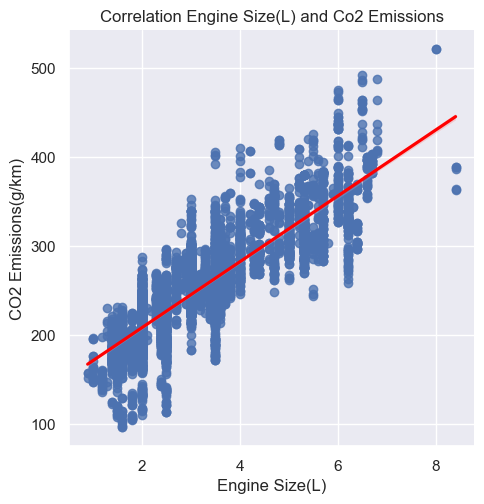

In [15]:
sns.lmplot(x= "Engine Size(L)", y= "CO2 Emissions(g/km)", data= cars, line_kws={'color': 'red'})
sns.set(rc={'figure.figsize':(5, 3)})
ax = plt.gca()
ax.set_title("Correlation Engine Size(L) and Co2 Emissions")
plt.show()

comment : The correlation between the engine size and Co2 emission is very strong

- What is the correlation between the Number of Cylinders and CO2 emissions?

In [16]:
corr= cars["Cylinders"].corr(cars["CO2 Emissions(g/km)"])
print("The correlation Cofficient between the number of Cylinders and Co2 emissions is {}".format(round(corr, 2)))


The correlation Cofficient between the number of Cylinders and Co2 emissions is 0.83


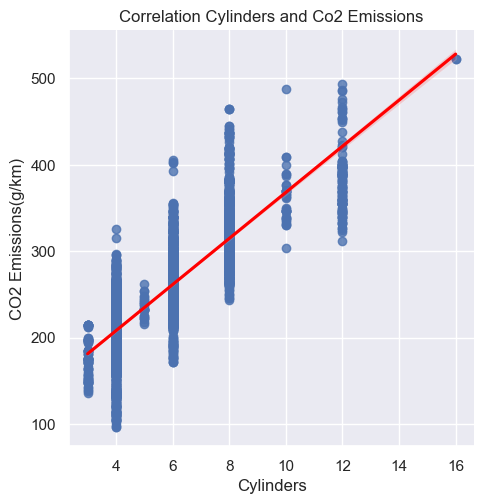

In [17]:
sns.lmplot(x= "Cylinders", y= "CO2 Emissions(g/km)", data= cars, line_kws={'color': 'red'})
sns.set(rc={'figure.figsize':(5, 3)})
ax = plt.gca()
ax.set_title("Correlation Cylinders and Co2 Emissions")
plt.show()

comment : The correlation between the Cylinders and Co2 emission is very strong

- What is the Top 10 makers who has the highest Co2 consumption? the lowest Co2 consumption?

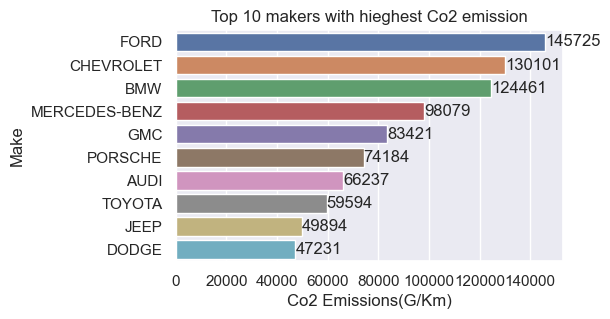

In [18]:
most_maker_CO2_emissions= cars.groupby("Make")["CO2 Emissions(g/km)"].sum().sort_values(ascending= False)[:10]
sns.barplot(x=most_maker_CO2_emissions.values, y=most_maker_CO2_emissions.index)
sns.set(rc={'figure.figsize':(5, 3)})
ax = plt.gca()
ax.bar_label(ax.containers[0])
ax.set_title("Top 10 makers with hieghest Co2 emission")
plt.xlabel("Co2 Emissions(G/Km)")
plt.ylabel("Make")
plt.show()

Comment: the highest Co2 emission make is FORD by 145725 G/KM

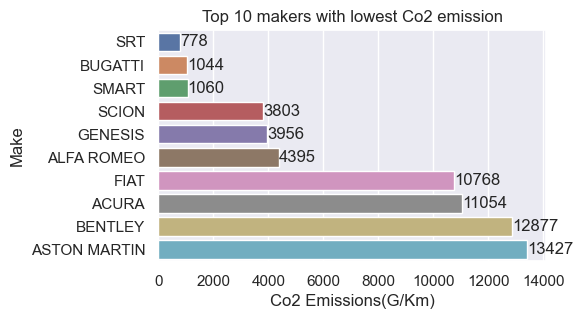

In [19]:
less_maker_CO2_emissions= cars.groupby("Make")["CO2 Emissions(g/km)"].sum().sort_values(ascending= True)[:10]
sns.barplot(x=less_maker_CO2_emissions.values, y=less_maker_CO2_emissions.index)
sns.set(rc={'figure.figsize':(5, 3)})
ax = plt.gca()
ax.bar_label(ax.containers[0])
ax.set_title("Top 10 makers with lowest Co2 emission")
plt.xlabel("Co2 Emissions(G/Km)")
plt.ylabel("Make")
plt.show()

Comment: the lowest Co2 emission make is SRT by 778 G/KM

- what is The top 10 hieghts Co2 emissions of model of every maker?

In [20]:
MM_deascending=cars.groupby(["Make","Model"])["CO2 Emissions(g/km)"].sum().sort_values(ascending= False)[:10]
MM_deascending

Make       Model        
FORD       F-150 FFV 4X4    8972
           F-150 FFV        8744
           MUSTANG          8601
GMC        SIERRA 4WD       7996
CHEVROLET  SILVERADO 4WD    7687
GMC        SIERRA           6743
CHEVROLET  SILVERADO        6731
           CAMARO           6000
FORD       F-150 4X4        5879
TOYOTA     TACOMA 4WD       5189
Name: CO2 Emissions(g/km), dtype: int64

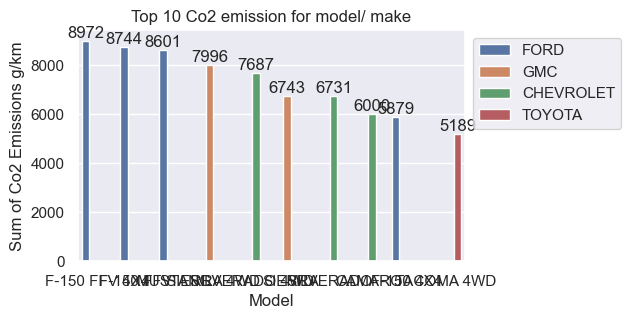

In [21]:
mm_deascending= pd.DataFrame(MM_deascending).reset_index()
sns.barplot(x="Model", y="CO2 Emissions(g/km)", hue="Make", data= mm_deascending)
sns.set(rc={'figure.figsize':(20, 5)})
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container)
ax.set_title("Top 10 Co2 emission for model/ make")
plt.xlabel("Model")
plt.ylabel("Sum of Co2 Emissions g/km")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

The Model F-150 FFV 4X4 Had the highest Co2 consumption model by 8972 and its Maker is FORD

- The top lowest Co2 emissions of model for every maker

In [22]:
MM_ascending=cars.groupby(["Make","Model"])["CO2 Emissions(g/km)"].sum().sort_values(ascending= True)[:10]
MM_ascending

Make        Model             
TOYOTA      COROLLA HYBRID        106
            PRIUS AWD             109
HONDA       INSIGHT TOURING       114
            INSIGHT EX            114
            INSIGHT EX/TOURING    115
            CIVIC HYBRID          120
VOLKSWAGEN  JETTA TURBO HYBRID    124
LEXUS       UX 250H               130
FORD        ESCAPE HYBRID         136
            ESCAPE HYBRID AWD     139
Name: CO2 Emissions(g/km), dtype: int64

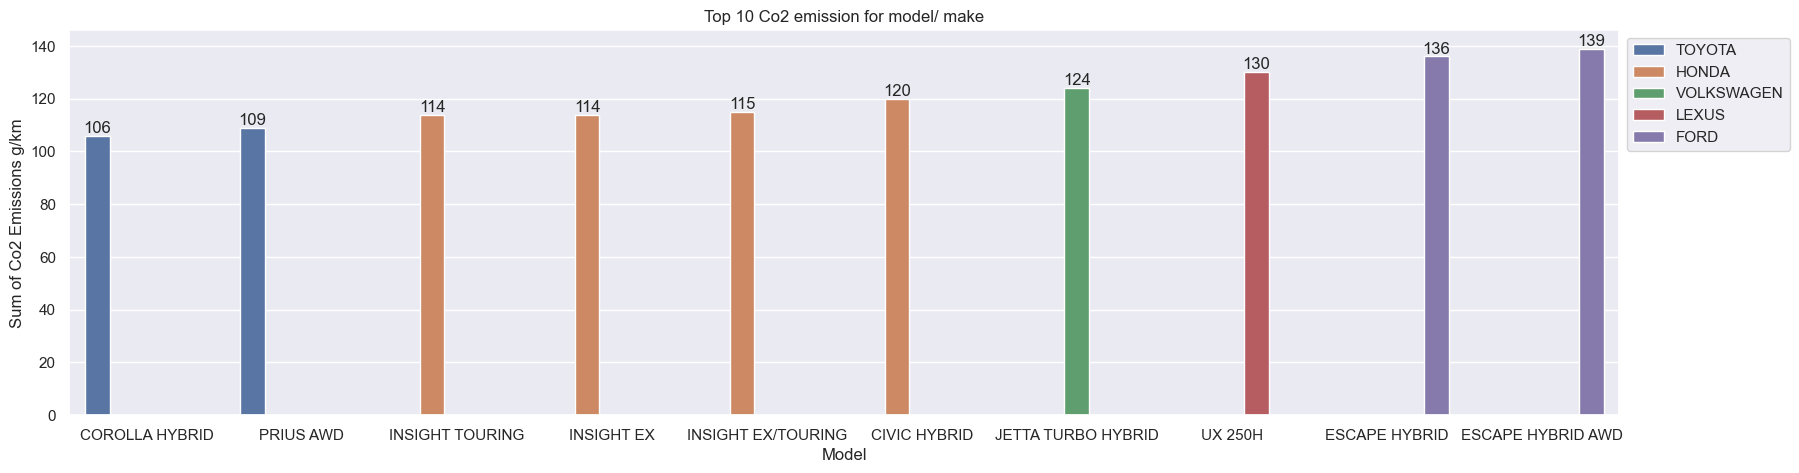

In [23]:
mm_ascending= pd.DataFrame(MM_ascending).reset_index()
sns.barplot(x="Model", y="CO2 Emissions(g/km)", hue="Make", data= mm_ascending)
sns.set(rc={'figure.figsize':(20, 5)})
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container)
ax.set_title("Top 10 Co2 emission for model/ make")
plt.xlabel("Model")
plt.ylabel("Sum of Co2 Emissions g/km")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

comment : The lowest Model had Co2 Emission is COROLLA HYBRID with 106 G/Km and its maker is TOYOTA

- What is the top 10 highest Co2 emission for vehicle Classes classified according to The model and the maker?

In [24]:
MMV_deascending=cars.groupby(["Make","Model", "Vehicle Class"])["CO2 Emissions(g/km)"].sum().sort_values(ascending= False)[:10]
MMV_deascending
MMV_de = pd.DataFrame(MMV_deascending).reset_index()
MMV_de

,Make,Model,Vehicle Class,CO2 Emissions(g/km)
0,FORD,F-150 FFV 4X4,PICKUP TRUCK - STANDARD,8972
1,FORD,F-150 FFV,PICKUP TRUCK - STANDARD,8744
2,FORD,MUSTANG,SUBCOMPACT,8601
3,GMC,SIERRA 4WD,PICKUP TRUCK - STANDARD,7996
4,CHEVROLET,SILVERADO 4WD,PICKUP TRUCK - STANDARD,7687
5,GMC,SIERRA,PICKUP TRUCK - STANDARD,6743
6,CHEVROLET,SILVERADO,PICKUP TRUCK - STANDARD,6731
7,FORD,F-150 4X4,PICKUP TRUCK - STANDARD,5879
8,TOYOTA,TACOMA 4WD,PICKUP TRUCK - SMALL,5189
9,GMC,CANYON,PICKUP TRUCK - SMALL,5136


In [25]:
print("Comment : The highest Vehicle Class classified according to the Model and the maker is {}".format(MMV_de.loc[0,"Vehicle Class"]) +" by {}".format(MMV_de.loc[0,"CO2 Emissions(g/km)"])+ " g/km")

Comment : The highest Vehicle Class classified according to the Model and the maker is PICKUP TRUCK - STANDARD by 8972 g/km


- What is the top 10 lowest Co2 emission for vehicle Classes classified according to The model and the maker?

In [26]:
MMV_ascending=cars.groupby(["Make","Model", "Vehicle Class"])["CO2 Emissions(g/km)"].sum().sort_values(ascending= True)[:10]
MMV_as = pd.DataFrame(MMV_ascending).reset_index()
MMV_as

,Make,Model,Vehicle Class,CO2 Emissions(g/km)
0,TOYOTA,COROLLA HYBRID,COMPACT,106
1,TOYOTA,PRIUS AWD,MID-SIZE,109
2,HONDA,INSIGHT TOURING,MID-SIZE,114
3,HONDA,INSIGHT EX,MID-SIZE,114
4,HONDA,INSIGHT EX/TOURING,MID-SIZE,115
5,HYUNDAI,SONATA HYBRID,FULL-SIZE,117
6,HONDA,CIVIC HYBRID,COMPACT,120
7,VOLKSWAGEN,JETTA TURBO HYBRID,COMPACT,124
8,LEXUS,UX 250H,COMPACT,130
9,FORD,ESCAPE HYBRID,SUV - SMALL,136


In [27]:
print("Comment : The lowest Vehicle Class classified according to the Model and the maker is {}".format(MMV_as.loc[0,"Vehicle Class"]) +" by {}".format(MMV_de.loc[0,"CO2 Emissions(g/km)"])+ " g/km")

Comment : The lowest Vehicle Class classified according to the Model and the maker is COMPACT by 8972 g/km


##  Good luck!